In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

Using TensorFlow backend.


60000 train samples
10000 test samples


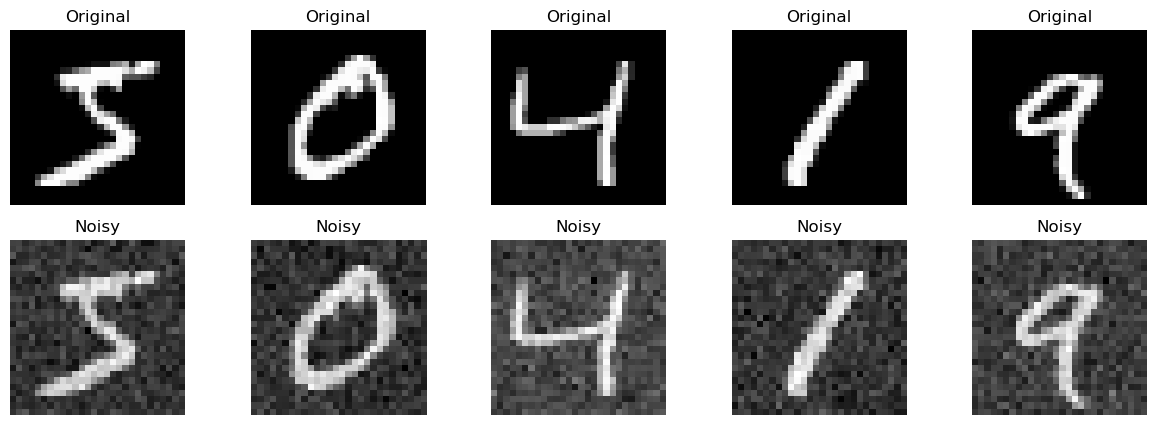

In [3]:
# Part 1
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
# Add random noise to the training images
train_noisy_images = x_train + np.random.normal(loc=0, scale=0.1, size=x_train.shape)

# Add random noise to the testing images
test_noisy_images = x_test + np.random.normal(loc=0, scale=0.1, size=x_test.shape)

# Reshape the noisy images back to their original shape for visualization
train_noisy_images_reshaped = train_noisy_images.reshape(-1, 28, 28)
test_noisy_images_reshaped = test_noisy_images.reshape(-1, 28, 28)

# Display several original and noisy images for inspection
num_images_to_display = 5
fig, axes = plt.subplots(2, num_images_to_display, figsize=(15, 5))

for i in range(num_images_to_display):
    axes[0, i].imshow(x_train[i].reshape(28, 28), cmap='gray')
    axes[0, i].axis('off')
    axes[0, i].set_title('Original')

    axes[1, i].imshow(train_noisy_images_reshaped[i], cmap='gray')
    axes[1, i].axis('off')
    axes[1, i].set_title('Noisy')

plt.show()

In [ ]:
# Part 2
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split

# Assuming x_train, y_train, x_test, y_test, train_noisy_images, test_noisy_images are available

# Split the original and noisy datasets into training and validation sets
x_train_orig, x_val_orig, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
x_train_noisy, x_val_noisy, _, _ = train_test_split(train_noisy_images, y_train, test_size=0.2, random_state=42)

# Define the MLNN model architecture
model_orig = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model_noisy = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the models
model_orig.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_noisy.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the models
epochs = 400
history_orig = model_orig.fit(x_train_orig, y_train, epochs=epochs, validation_data=(x_val_orig, y_val), verbose=0)
history_noisy = model_noisy.fit(x_train_noisy, y_train, epochs=epochs, validation_data=(x_val_noisy, y_val), verbose=0)

# Evaluate the models
train_acc_orig = history_orig.history['accuracy'][-1]
val_acc_orig = history_orig.history['val_accuracy'][-1]

train_acc_noisy = history_noisy.history['accuracy'][-1]
val_acc_noisy = history_noisy.history['val_accuracy'][-1]

# Compare the accuracies
print(f"Original Model - Training Accuracy: {train_acc_orig}, Validation Accuracy: {val_acc_orig}")
print(f"Noisy Model - Training Accuracy: {train_acc_noisy}, Validation Accuracy: {val_acc_noisy}")

In [ ]:
# Part 3
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split

# Define the scale factors for noise
scale_factors = [0.1, 0.5, 1.0, 2.0, 4.0]

# Initialize lists to store the accuracies
train_accs = []
val_accs = []

# Assuming x_train, y_train, x_test, y_test are available

# Split the original dataset into training and validation sets
x_train_orig, x_val_orig, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Define the MLNN model architecture
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model with varying levels of noise
epochs = 10  # Number of epochs for training
for scale in scale_factors:
    # Add random noise to the training and validation sets
    x_train_noisy = x_train_orig + np.random.normal(loc=0, scale=scale, size=x_train_orig.shape)
    x_val_noisy = x_val_orig + np.random.normal(loc=0, scale=scale, size=x_val_orig.shape)

    # Train the model with noisy data
    history = model.fit(x_train_noisy, y_train, epochs=epochs, validation_data=(x_val_noisy, y_val), verbose=0)

    # Record the training and validation accuracies
    train_accs.append(history.history['accuracy'][-1])
    val_accs.append(history.history['val_accuracy'][-1])

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(scale_factors, train_accs, marker='o', label='Training Accuracy')
plt.plot(scale_factors, val_accs, marker='o', label='Validation Accuracy')
plt.xlabel('Scale Factor')
plt.ylabel('Accuracy')
plt.title('Effect of Noise on Model Accuracy')
plt.xticks(scale_factors)
plt.legend()
plt.show()